In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [32]:
wh = pd.read_csv('dataset.csv')
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [33]:
print('Our Data has {} samples.'.format(wh.shape[0]))

Our Data has 10000 samples.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

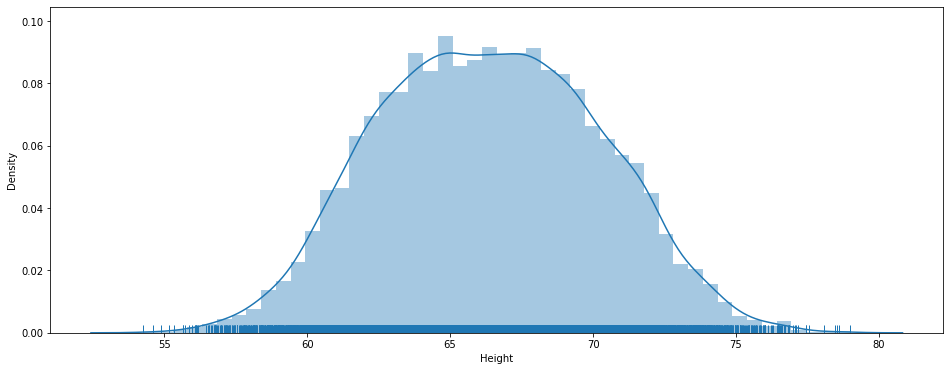

In [34]:
plt.figure(figsize=(16, 6))
sb.distplot(wh['Height'], rug = True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

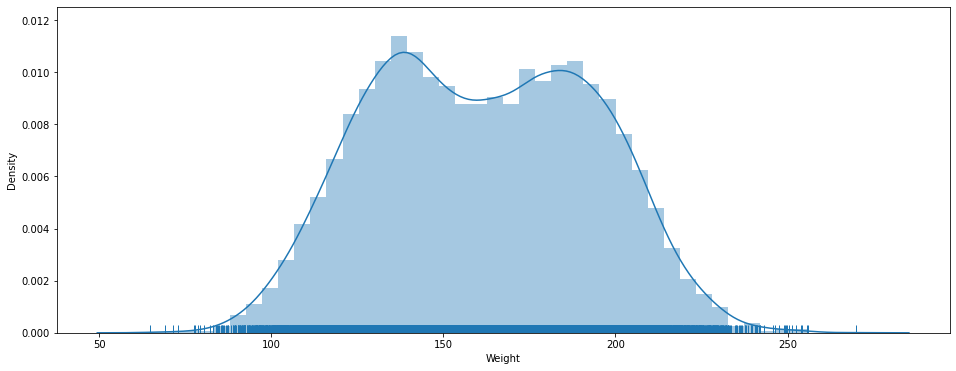

In [35]:
plt.figure(figsize=(16, 6))
sb.distplot(wh['Weight'], rug = True)


<Figure size 1152x432 with 0 Axes>

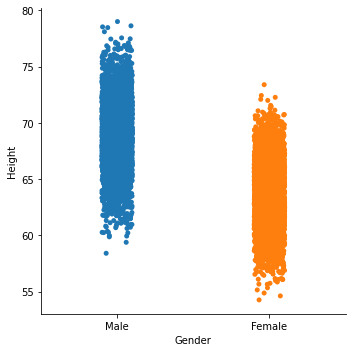

In [36]:
plt.figure(figsize=(16, 6))
sb.catplot(x = 'Gender', y = 'Height', data = wh)


<Figure size 1152x432 with 0 Axes>

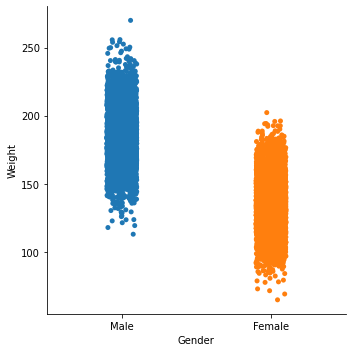

In [37]:
plt.figure(figsize=(16, 6))
sb.catplot(x = 'Gender', y = 'Weight', data = wh)


<Figure size 720x576 with 0 Axes>

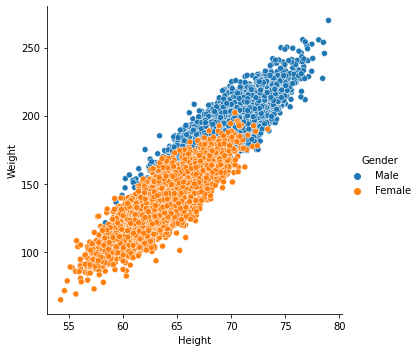

In [38]:
plt.figure(figsize = (10, 8))
sb.relplot(x = 'Height', y = 'Weight', data = wh, hue = 'Gender')
plt.show()

<AxesSubplot:>

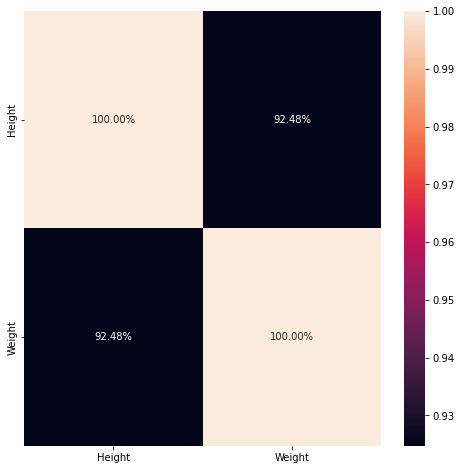

In [39]:
plt.figure(figsize=(8, 8))
sb.heatmap(wh[['Height', 'Weight']].corr(), annot=True, fmt='.2%')

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = wh.iloc[:, [1, 2]].values
y = wh.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability = True))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [41]:
clf.score(X_train, y_train)

0.9147142857142857

In [42]:
clf.score(X_test, y_test)

0.919

In [43]:
clf.predict_proba([[64, 152]])

array([[0.80190537, 0.19809463]])